In [1]:
import dotenv
import finnhub
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd

# Necessary to be able to import helper functions from dashboard folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)
from dashboard.utils import get_ticker_symbols
# Load .env file from dashboard folder
dotenv.load_dotenv(os.path.join(project_root, 'dashboard', '.env'))
finnhub_client = finnhub.Client(os.getenv('FINNHUB_API_KEY_RESERVED'))
ticker_list = get_ticker_symbols()
recommendation_list = []
for ticker_symbol in ticker_list:
  recommendation_response = finnhub_client.recommendation_trends(ticker_symbol)
  recommendation_list.append(recommendation_response[0])
df = pd.DataFrame(recommendation_list)



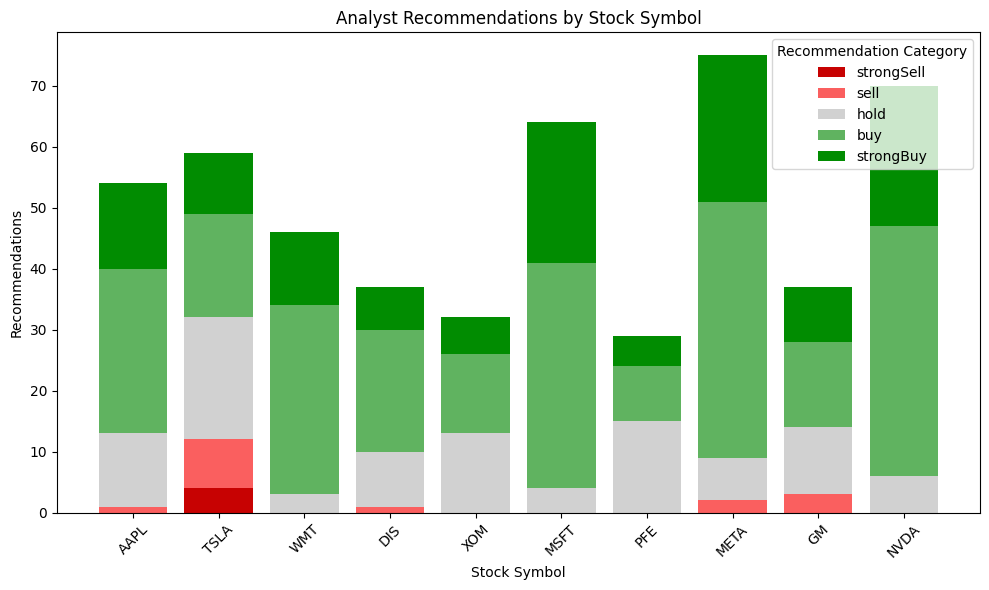

In [46]:
categories = ['strongSell', 'sell', 'hold', 'buy', 'strongBuy']
colors = ['#c70202', '#fa5f5f', '#d1d1d1', '#60b360', '#018c01']
df.set_index('symbol', inplace=True)
fig, ax = plt.subplots(figsize=(10, 6))
bottom = None

for idx, category in enumerate(categories):
  if bottom is None:
    bottom = df[category]
    ax.bar(df.index, df[category], color=colors[idx], label=category)
  else:
    ax.bar(df.index, df[category], bottom=bottom, color=colors[idx], label=category)
    bottom += df[category]

ax.set_xlabel("Stock Symbol")
ax.set_ylabel("Recommendations")
ax.set_title("Analyst Recommendations by Stock Symbol")
ax.legend(title="Recommendation Category")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()